## Project: PCA and tSNE
 **Marks: 30**
-----------------------------

Welcome to the project on PCA and tSNE. In this project. We will be using the auto-mpg dataset.

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to explore the data and reduce the number of features by using dimensionality reduction techniques like PCA and TSNE and generate meaningful insights. 

-----------------------------
## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

## Importing necessary libraries and overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Loading data

In [2]:
data = pd.read_csv("auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


#### Check the info of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are 398 observations and 8 columns in the data.
- All variables except horsepower and car name are of numeric data type.
- The horsepower must be a numeric data type. We will explore this further.

## Data Preprocessing and Exploratory Data Analysis

In [5]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [6]:
# dropping car_name
data1 = data.copy()
data = data.drop(['car name'], axis=1)

#### Checking values in horsepower column

In [7]:
# checking if there are values other than digits in the column 'horsepower' 
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # if the string is made of digits store True else False

# print isDigit = False!
data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are 6 observations where horsepower is ?.
- We can consider these values as missing values.
- Let's impute these missing values and change the data type of horsepower column.
- First we need to replace the ? with np.nan.

In [8]:
#Relacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [9]:
# Imputing the missing values with median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object data type to float

#### Summary Statistics

#### Question 1: 
- **Check the summary statistics of the data (use describe function) (1 Mark)**
- **Write your observations (1 Mark)**

In [10]:
#Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:**

*Distribution Notes* 
* displacement, weight, horsepower,mpg, and acceleration are all observed to have high variation between 75% values and maximum values. Possible that these columns are long right tailed distributions. 

* Weight and mpg have min values that are magnitudes lower than 25%. It's possible that these distributions have long left tails. 

*Deviation Notes*
* Weight is observed to have the greatest standard deviation -- possibly indicating a wide array of types of vehicles in the data set. (Semi-trucks, pickups, SUV's, cars.) 
* Model year, acceleration, and cylinders have the lowest standard deviation, possibly indicating low variance in these parameters 


#### Let's check the distribution and outliers for each column in the data

#### Question 2:
- **Create the histogram to check distribution of all variables (use .hist() attribute) (1 Mark)**
- **Create boxplot to visualize outliers for all variables (use sns.boxplot()) (1 Mark)**
- **Write your observations (2 Marks)**

mpg
Skew : 0.46


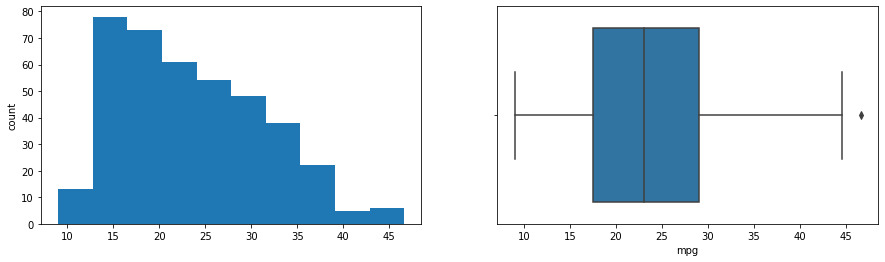

cylinders
Skew : 0.53


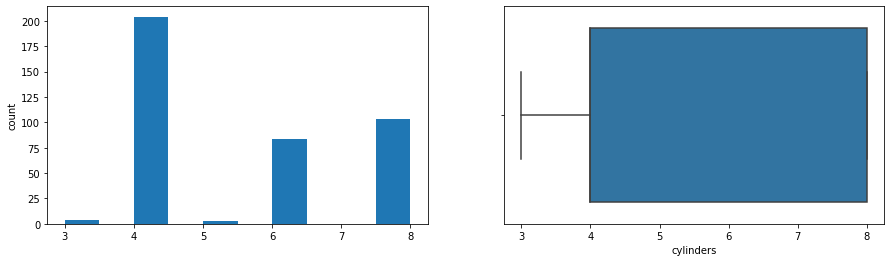

displacement
Skew : 0.72


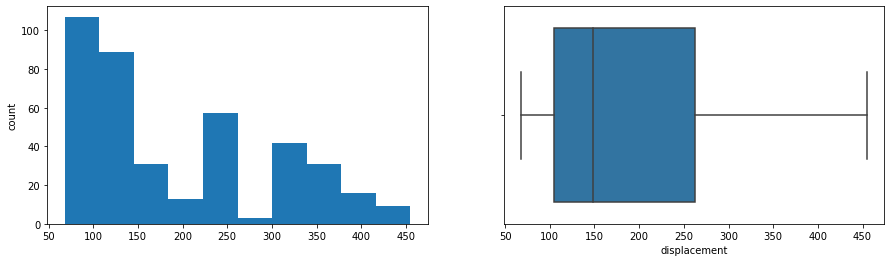

horsepower
Skew : 1.11


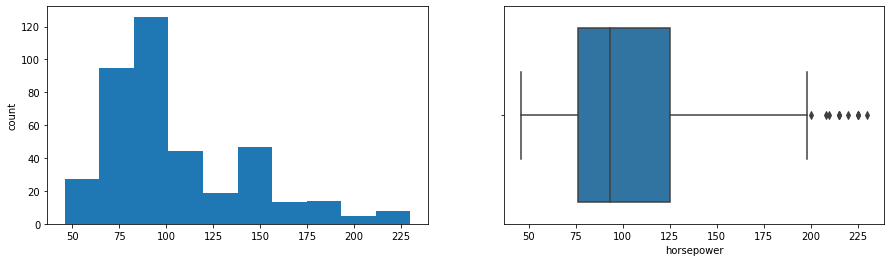

weight
Skew : 0.53


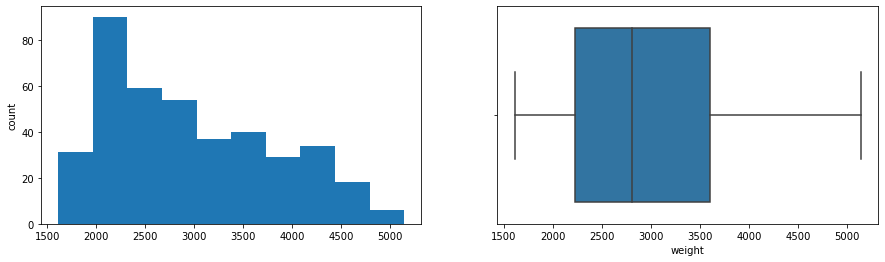

acceleration
Skew : 0.28


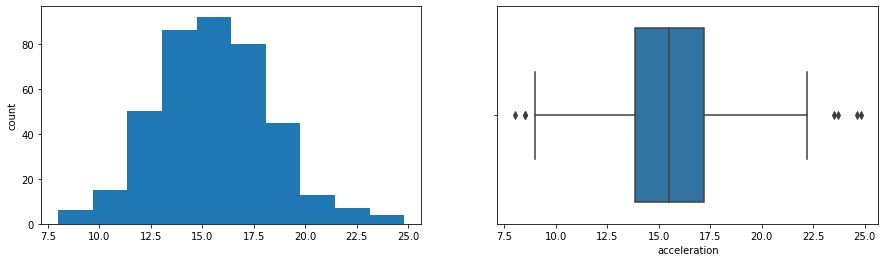

model year
Skew : 0.01


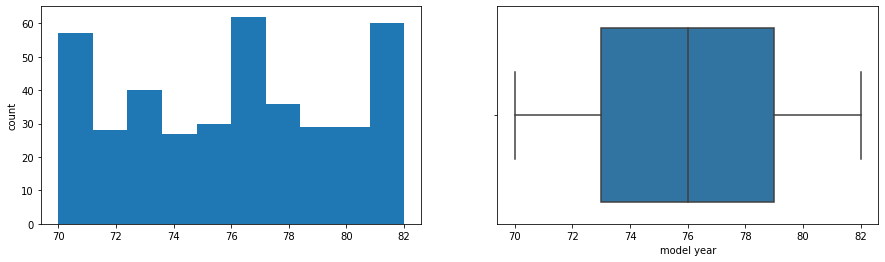

In [11]:
# Uncomment and complete the code by filling the blanks 

for col in data.columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**
* Acceleration and model year have minimal skew, and indicate a relatively normal distribution, albeit acceleration has long tailed outliers on the left and right 
    * Acceleration does, however, have a bit of a right skew with more right-sided outliers than left. 
* model_year seems like a relatively uniform distribution
* Horsepower has the most skew with a long right-sided tail 
* Given how mean acceleration for 0-60 is centered around 16.0 seconds, this seems to be either really slow cars or rather old data. 

#### Checking correlation

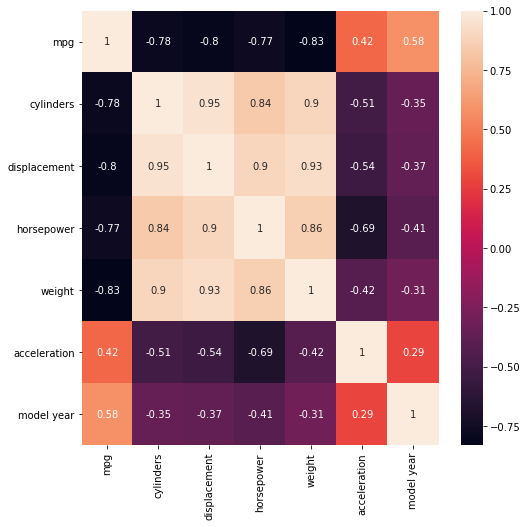

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**
- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

#### Scaling the data

In [13]:
# scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [14]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## Principal Component Analysis

#### Question 3:

- **Apply the PCA algorithm with number of components equal to the total number of columns in the data with random_state=1 (2 Marks)**
- **Write observations on the variance explained by components (2 Marks)**

In [15]:
#scaling the data so that higher magnitude variables don't dominate smaller ones
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [16]:
#Defining the number of principal components to generate 
#Note: documentation here https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components = n, random_state = 1) #Apply the PCA algorithm with random state = 1
pca
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) #Fit and transform the pca function on scaled data

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

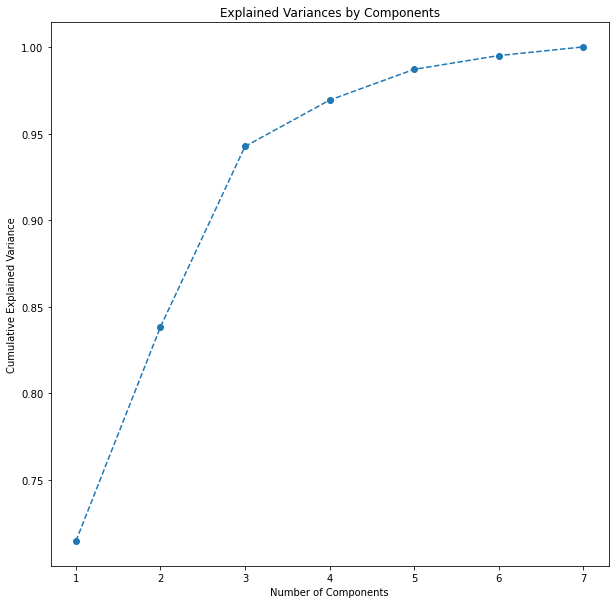

In [17]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [18]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break
    
print(exp_var)

Number of PCs that explain at least 90% variance:  3
[0.71476787 0.1236554  0.10414042 0.02671968 0.01778617 0.00790889
 0.00502158]


**Observations:**

* One variable explains 71% of the data, two explain 84%, and three explain 94%. This is a reduction from eight features. 
* So this is a 62% reduction in dimensionality and a 5% reduction in variance. 
* We now looka the principal components as a linear combination of orignal features. 
* It's worth noting that scaling the dataframe beforehand is very important, as there are several variables with different units and magnitudes. 

In [19]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


#### Question 4: **Interpret the coefficients of three principal components from the below dataframe (6 Marks)**

In [20]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:**
* PC1 is related to more powerful or larger cars; higher number of cylinders, displacement, horsepower, and weight. It is negatively correlated with mpg, which is associated with smaller, more agile cars. 

* PC2 is related to older cars, which in turn, have a slight tendency to be heavier, lower power, and lower mpg. 

* PC3 is related to fast cars; ones that have high acceleration, but conversely tend to be a bit heavier and slightly more cylinders. 

#### We can also visualize the data in 2 dimensions using first two principal components 

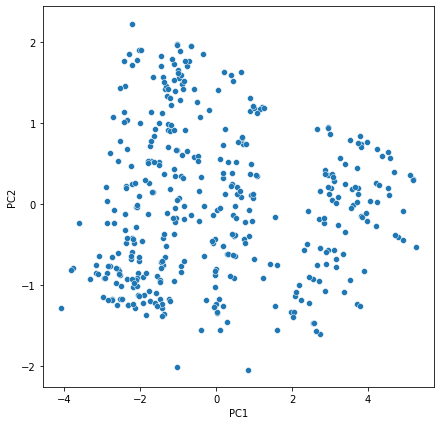

In [21]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Let's try adding hue to the scatter plot**

#### Question 5: 

- **Create a scatter plot for first two principal components with hue = 'cylinders' (2 Marks)** 
- **Write your observations on the plot (2 Marks)**

Text(0, 0.5, 'PC2')

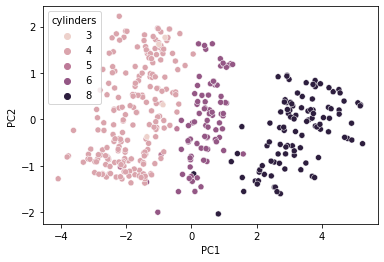

In [22]:
df_concat = pd.concat([data_pca1, data], axis=1)
data_pca1
# plt.figure(figsize = (7,7))
#Create a scatter plot with x=0 and y=1 using df_concat dataframe
sns.scatterplot(x= df_concat[0], y =df_concat[1], data=df_concat, hue='cylinders')
plt.xlabel("PC1")
plt.ylabel("PC2")

**Observations:**

* While there are five groups of cylinder number, there are three visibly distinct clustered groupings; 3-4, 5-6, and 8.
* PC1 shows a positive relationship with number of cylinders but in these three segments. 

## t-SNE

#### Question 6: 
- **Apply the TSNE embedding with 2 components for the dataframe data_scaled (use random_state=1) (2 Marks)**
- **Write your observations on the below scatter plots (2 Marks)**   

In [23]:
#create two 

In [24]:
tsne = TSNE(n_components=2, random_state=1)  #Apply the TSNE algorithm with random state = 1
data_tsne = tsne.fit_transform(data_scaled) #Fit and transform tsne function on the scaled data

In [25]:
data_tsne.shape

(398, 2)

In [26]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [27]:
data_tsne.head()

,Component 1,Component 2
0,-38.088413,-15.912958
1,-37.404369,-17.995850
2,-38.050472,-17.063194
3,-37.718334,-16.476006
4,-38.404663,-16.763493


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

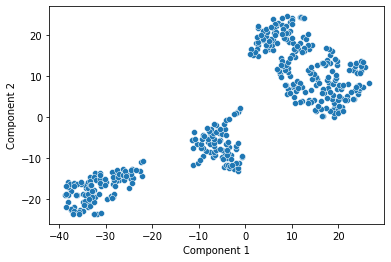

In [28]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

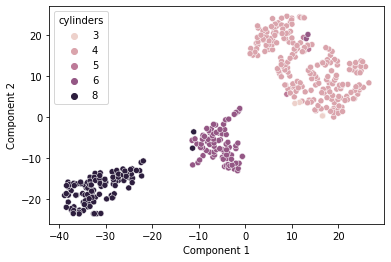

In [29]:
# Let's see scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data.cylinders)

**Observations:**

* The clustered variation observed with the increase of cylinders indicates a pattern 
 * As Component 1 increases, cylinders decrease in observable ways
 * as Component 2 increases cylinders similarly decrease 

In [30]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component> 0) and (second_component >0): 
        return 'group_1'
    if (first_component >-20 ) and (first_component < 5):
        return 'group_2'
    else: 
        return 'group_3'

In [35]:
data_tsne['groups'] = data_tsne.apply(grouping,axis=1)
data_tsne

,Component 1,Component 2,groups
0,-38.088413,-15.912958,group_3
1,-37.404369,-17.995850,group_3
2,-38.050472,-17.063194,group_3
3,-37.718334,-16.476006,group_3
4,-38.404663,-16.763493,group_3
...,...,...,...
393,7.718775,12.765486,group_1
394,12.673934,24.179510,group_1
395,1.030831,15.439157,group_1
396,10.512836,16.553902,group_1


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

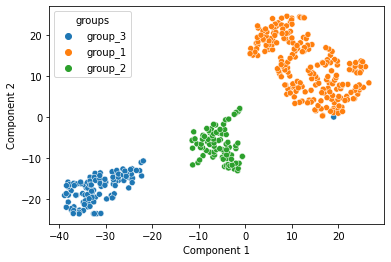

In [36]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data_tsne.iloc[:,2])

In [37]:
data['groups'] = data_tsne['groups'] 

#### Question 7: 
- **Complete the following code by filling the blanks (2 Marks)**
- **Write your observations on different groups w.r.t different variables (4 Marks)**

In [40]:
data['groups']

0      group_3
1      group_3
2      group_3
3      group_3
4      group_3
        ...   
393    group_1
394    group_1
395    group_1
396    group_1
397    group_1
Name: groups, Length: 398, dtype: object

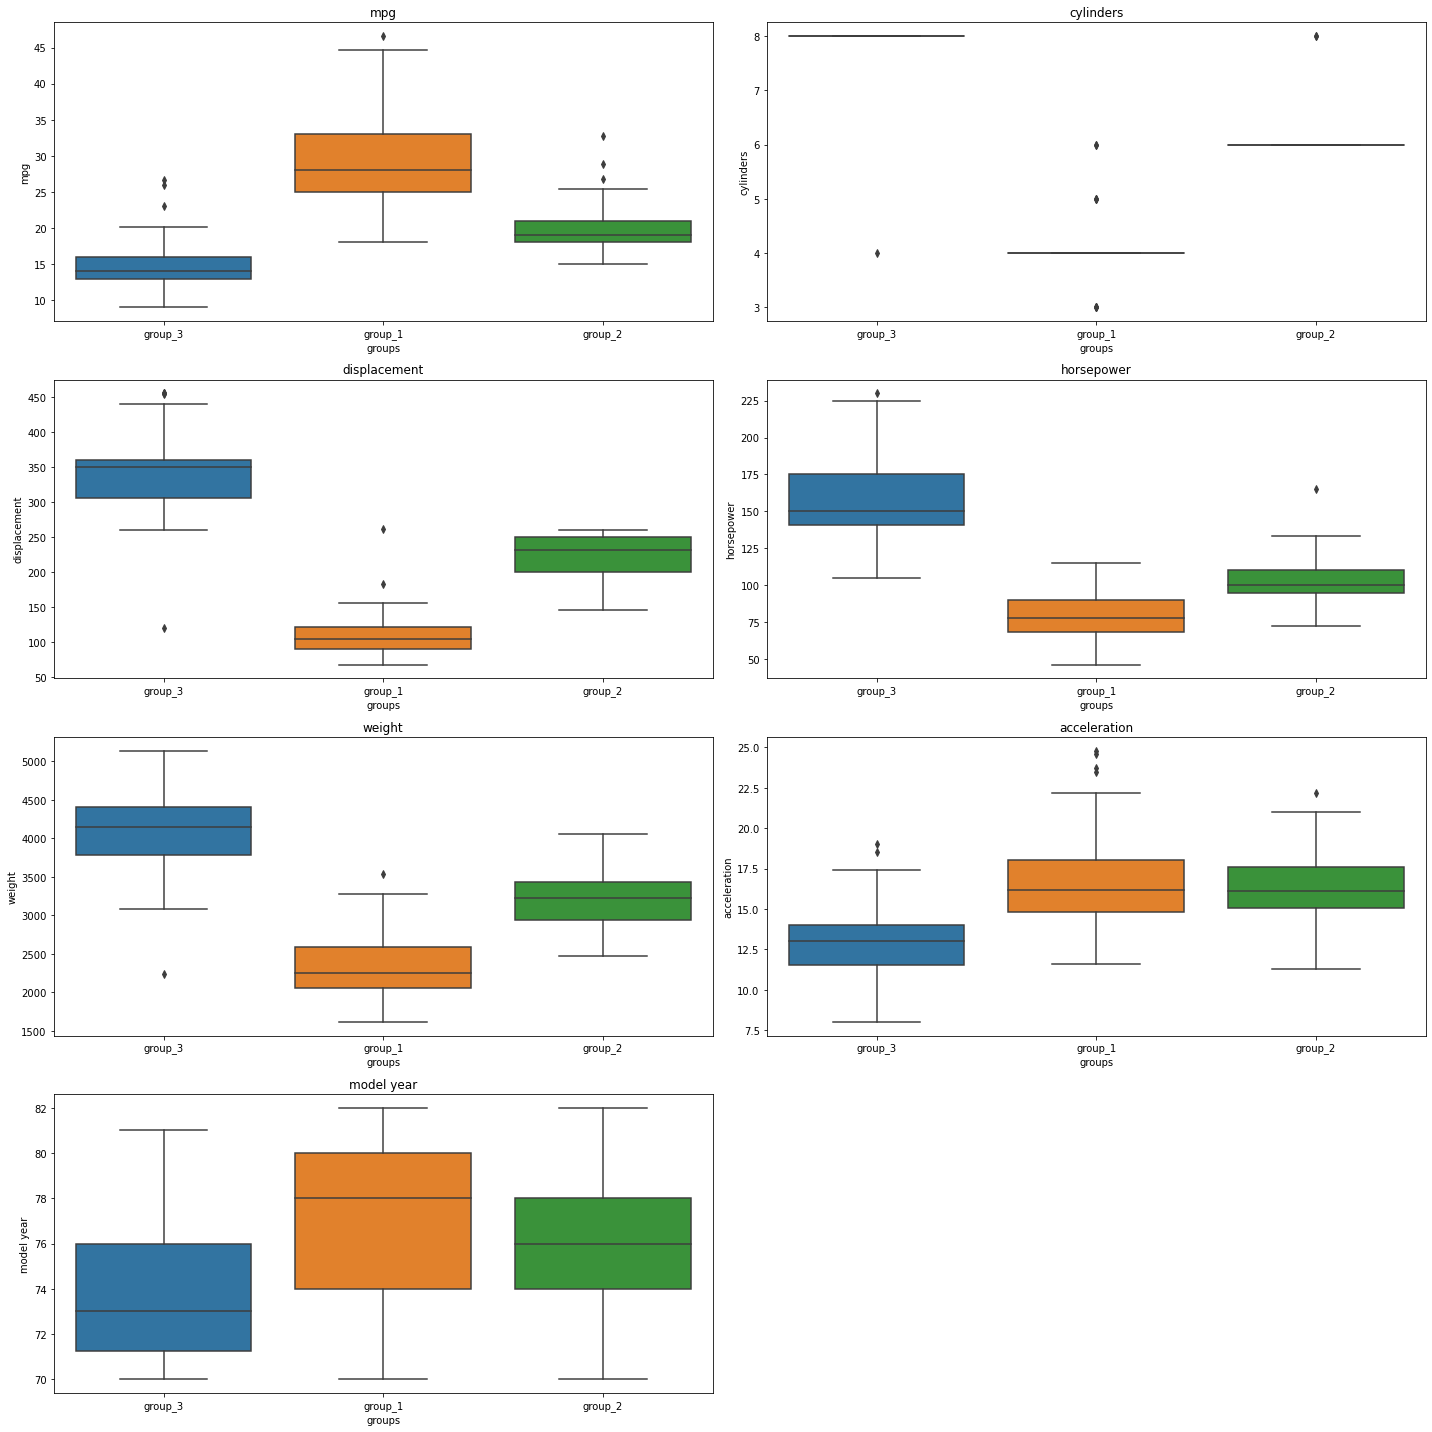

In [41]:
all_col = data.columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(all_col):
    if i==7:
        break
    plt.subplot(4, 2, i + 1)
    #Create boxplot with groups on the x-axis and variable on the y-axis (use the dataframe data)
    sns.boxplot(x= data['groups'], y=data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:**

* There are three groups in the data; each group has their own characteristics.
 * Group 1 demonstrates higher cylinders, which in turn means higher horsepower, heavier (as cylinders aren't light) higher displacement and lower mpg. This profile can best be characterized by higher power cars which tend to be older. 
 * Group 2 is indicative of newer, lighter cars. They tend to have the lowest displacement and horsepower, fewer cylinders, and the highest mpg. 
 * Group 3 is the middle child of the groupings; it catches a narrow band of acceleration, and is largely average in all other dimensions. 